In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_pickle('./data/final_df')

In [3]:
X = df.drop(['Kp','ap'],axis = 1)
y = df['Kp']

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

## Generating model 

In [4]:
input_shape = X_train.shape[1]

model = keras.Sequential()
model.add(layers.Input(shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2368      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [5]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])  # You can add other metrics as needed

In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
301/301 [==============================] - 1s 2ms/step - loss: 381.8418 - mean_absolute_error: 10.2388 - val_loss: 5.8616 - val_mean_absolute_error: 1.8028
Epoch 2/50
301/301 [==============================] - 0s 1ms/step - loss: 11.7474 - mean_absolute_error: 2.5078 - val_loss: 1.3811 - val_mean_absolute_error: 0.8925
Epoch 3/50
301/301 [==============================] - 0s 1ms/step - loss: 3.7196 - mean_absolute_error: 1.4250 - val_loss: 1.4820 - val_mean_absolute_error: 1.0185
Epoch 4/50
301/301 [==============================] - 0s 1ms/step - loss: 2.2062 - mean_absolute_error: 1.1391 - val_loss: 1.3812 - val_mean_absolute_error: 0.8985
Epoch 5/50
301/301 [==============================] - 0s 1ms/step - loss: 1.8548 - mean_absolute_error: 1.0456 - val_loss: 1.2782 - val_mean_absolute_error: 0.9140
Epoch 6/50
301/301 [==============================] - 0s 1ms/step - loss: 1.7887 - mean_absolute_error: 1.0346 - val_loss: 1.3616 - val_mean_absolute_error: 0.8904
Epoch 7/50
3

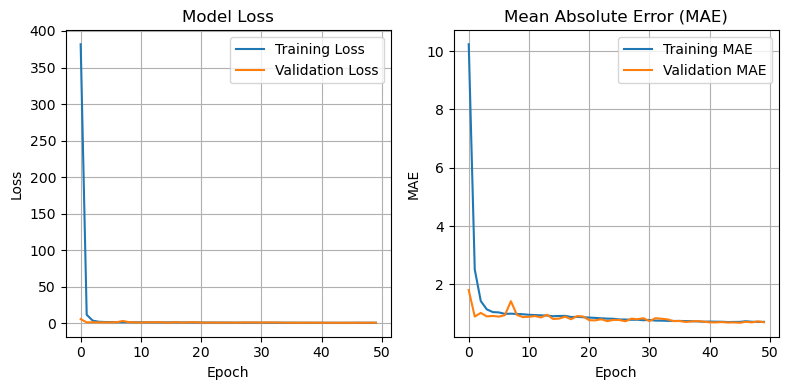

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # 2 rows, 1 column

# Plot the first subplot (Training Loss and Validation Loss)
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot the second subplot (Training MAE and Validation MAE)
axs[1].plot(history.history['mean_absolute_error'], label='Training MAE')
axs[1].plot(history.history['val_mean_absolute_error'], label='Validation MAE')
axs[1].set_title('Mean Absolute Error (MAE)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [8]:
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

108/108 [==============================] - 0s 602us/step
Mean Absolute Error (MAE): 0.69
Mean Squared Error (MSE): 0.84


In [11]:
y_pred

array([[2.436776 ],
       [2.5473425],
       [1.2890673],
       ...,
       [2.5674133],
       [1.7584121],
       [2.3619192]], dtype=float32)

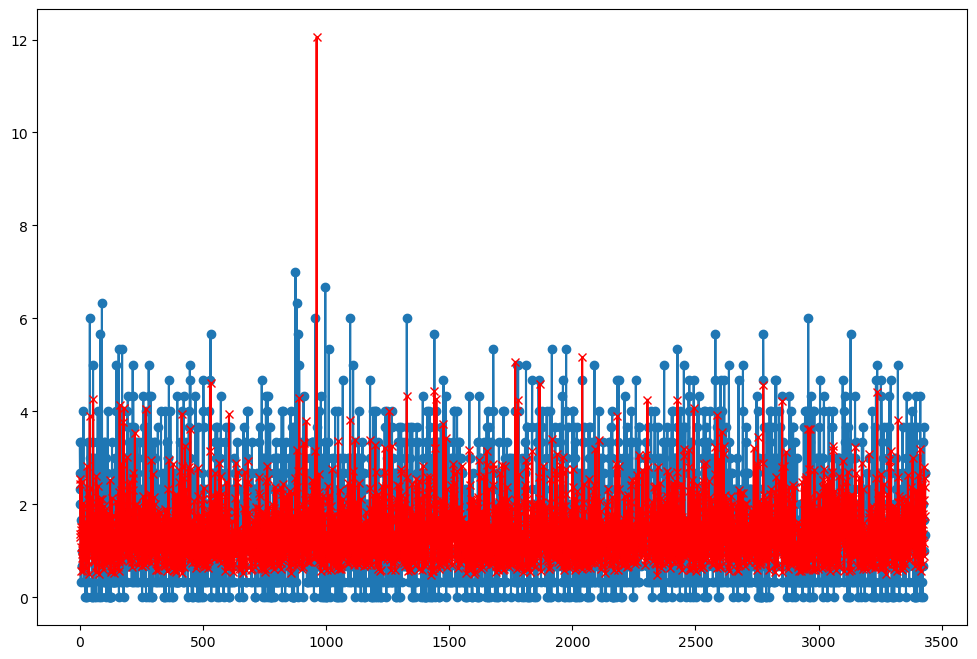

In [24]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(y_test)), y_test, label='y_test', marker='o')
plt.plot(np.arange(len(y_test)), y_pred, label='y_pred', marker='x', c='r')
plt.show()